In [1]:
import torch
from torch.utils.data import Dataset
import pathlib
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [2]:
class modified_dataset_loader(Dataset):
    def __init__(self,targ_dir: str,transformations=None):
        
        def image_fetch(src,image_paths):
            l=os.listdir(src)
            if(len(l)!=0):
                for i in range(len(l)):
                    if(".jpg" in l[i] or ".jpeg" in l[i] or ".png" in l[i]):
                        image_paths.append(str(src+l[i]))
                    elif("." not in l[i]):
                        try:
                            image_fetch(str(src+l[i]+"/"),image_paths)
                        except:
                            continue
                            
        def class_fetch(image_paths)->(list,dict):
            s=set()
            for i in image_paths:
                s.add(i.split("/")[-2])
            d={}
            count=0
            for i in s:
                d[i]=count
                count+=1
            return list(s),d

        self.transform=transformations
        self.paths=[]
        image_fetch(targ_dir,self.paths)
        self.classes, self.class_to_idx=class_fetch(self.paths)

    def load_image(self,index)-> Image.Image:
        image_path=self.paths[index]
        return Image.open(image_path)

    def __len__(self):
        return len(self.paths)

    def __getitem__(self,index):
        image=self.load_image(index)
        class_val=self.class_to_idx[(self.paths[index]).split("/")[-2]]
        if(self.transform):
            image=self.transform(image)
        return image,class_val

In [3]:
def image_fetch(src,image_paths):
    l=os.listdir(src)
    if(len(l)!=0):
        for i in range(len(l)):
            if(".jpg" in l[i] or ".jpeg" in l[i] or ".png" in l[i]):
                image_paths.append(str(src+l[i]))
            elif("." not in l[i]):
                try:
                    image_fetch(str(src+l[i]+"/"),image_paths)
                except:
                    continue
        

In [4]:
image_paths=[]
src="./"
image_fetch(src,image_paths)

In [5]:
def indexing(set1):
    dict1={set1[i]for i in set1}

In [6]:
l1=set()
for i in image_paths:
    l1.add(i.split("/")[-2])

In [7]:
list(l1)

['pizza', 'steak']

In [8]:
for i in l1:
    print(i)

pizza
steak


In [9]:
len(l1)

2

In [10]:
def class_fetch(image_paths)->(list,dict):
    s=set()
    for i in image_paths:
        s.add(i.split("/")[-2])
    d={}
    count=0
    for i in s:
        d[i]=count
        count+=1
    return list(s),d

In [11]:
class_fetch(image_paths)

(['pizza', 'steak'], {'pizza': 0, 'steak': 1})

In [12]:
torch.tensor(cv2.imread(image_paths[0])).type(torch.int32)

tensor([[[255, 255, 245],
         [255, 255, 245],
         [255, 255, 246],
         ...,
         [ 31,  94, 154],
         [ 37,  99, 159],
         [ 33,  93, 152]],

        [[255, 255, 247],
         [255, 255, 245],
         [254, 255, 245],
         ...,
         [ 53, 114, 176],
         [ 56, 116, 176],
         [ 40,  98, 157]],

        [[255, 255, 248],
         [255, 255, 245],
         [255, 255, 246],
         ...,
         [ 62, 119, 181],
         [ 63, 118, 179],
         [ 40,  94, 155]],

        ...,

        [[ 40,  46,  59],
         [ 21,  27,  40],
         [ 21,  28,  43],
         ...,
         [ 60,  78, 101],
         [ 44,  60,  83],
         [ 60,  76,  99]],

        [[ 52,  57,  72],
         [ 39,  44,  59],
         [ 24,  31,  46],
         ...,
         [ 51,  68,  94],
         [ 48,  63,  89],
         [ 70,  85, 111]],

        [[ 53,  58,  73],
         [ 49,  54,  69],
         [ 20,  27,  42],
         ...,
         [ 31,  51,  76],
        

In [61]:
dataload=modified_dataset_loader("./pizza_steak/")

In [62]:
len(dataload.paths)

197

In [21]:
import torchvision
torchvision.transforms.ToTensor(dataload.__getitem__(10)[0])

TypeError: ToTensor.__init__() takes 1 positional argument but 2 were given

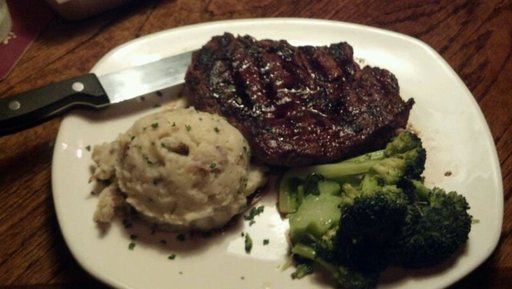

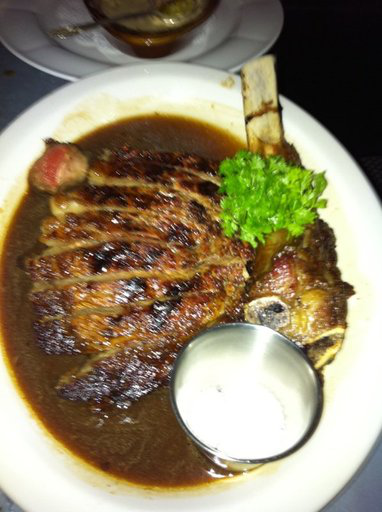

In [89]:
n=torch.randint(0,197,size=(1,))
dataload.__getitem__(n)[0]

In [88]:
print(dataload.classes[dataload.__getitem__(n)[1]])

pizza
